In [85]:
import zipfile
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import metrics
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.callbacks import EarlyStopping

# Importation

In [1]:
with zipfile.ZipFile("Dataset.zip","r") as zip_ref:
    zip_ref.extractall()

In [2]:
path_train = "Dataset/Training/"

path_test = "Dataset/Testing/TestSet/"

train_files = ['Features_Variant_1.csv', 'Features_Variant_2.csv', 'Features_Variant_3.csv', 
              'Features_Variant_4.csv', 'Features_Variant_5.csv']

test_files = ['Test_Case_1.csv', 'Test_Case_2.csv', 'Test_Case_3.csv',
              'Test_Case_4.csv', 'Test_Case_5.csv', 'Test_Case_6.csv', 
              'Test_Case_7.csv', 'Test_Case_8.csv', 'Test_Case_9.csv', 
              'Test_Case_10.csv']

### Ajouter header aux fichiers

In [3]:
header = ['Page_popularity', 'Page_checkins', 'Page_talking_about', 'Page_category', 'CC1_min', 'CC1_max', 'CC1_avg',
 'CC1_median', 'CC1_std', 'CC2_min', 'CC2_max', 'CC2_avg', 'CC2_median', 'CC2_std', 'CC3_min', 'CC3_max', 'CC3_avg', 
 'CC3_median', 'CC3_std', 'CC4_min', 'CC4_max', 'CC4_avg', 'CC4_median', 'CC4_std', 'CC5_min', 'CC5_max', 'CC5_avg', 
 'CC5_median', 'CC5_std', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base_time', 'Post_lenght', 'Post_share_count', 
 'Post_promotion_status', 'H_local', 'Post_published_sunday', 'Post_published_monday', 'Post_published_tuesday', 
 'Post_published_wednesday', 'Post_published_thursday', 'Post_published_friday', 'Post_published_saturday', 
 'Base_DateTime_sunday', 'Base_DateTime_monday', 'Base_DateTime_tuesday', 'Base_DateTime_wednesday', 
 'Base_DateTime_thursday', 'Base_DateTime_friday', 'Base_DateTime_saturday', 'Target_variable']

Ajout des headers aux fichiers train

In [4]:
for f in train_files:
  temp = pd.read_csv(f"{path_train}{f}", index_col=False, header=None)
  temp.columns = header
  temp.to_csv(f"{path_train}{f}", index=False)

Ajout des headers aux fichiers test

In [5]:
for f in test_files:
  temp = pd.read_csv(f"{path_test}{f}", index_col=False, header=None)
  temp.columns = header
  temp.to_csv(f"{path_test}{f}", index=False)

### Combiner fichiers en 1 seul fichier

Train

In [6]:
all_train = pd.concat([pd.read_csv(f"{path_train}{f}") for f in train_files], sort=False)
all_train.info

<bound method DataFrame.info of         Page_popularity  Page_checkins  Page_talking_about  Page_category  \
0                634995              0                 463              1   
1                634995              0                 463              1   
2                634995              0                 463              1   
3                634995              0                 463              1   
4                634995              0                 463              1   
...                 ...            ...                 ...            ...   
199025          7170111             70              497000              9   
199026          7170111             70              497000              9   
199027          7170111             70              497000              9   
199028          7170111             70              497000              9   
199029          7170111             70              497000              9   

        CC1_min  CC1_max     CC1_avg  CC1_m

In [7]:
all_train.to_csv(f"{path_train}All_Training.csv", sep=',', index=False)

Test

In [8]:
all_test = pd.concat([pd.read_csv(f"{path_test}{f}") for f in test_files], sort=False)
all_test.info

<bound method DataFrame.info of     Page_popularity  Page_checkins  Page_talking_about  Page_category  \
0           1340759          33935               49392              9   
1            161455              0                5978              4   
2             92385             88               34785             70   
3            395272              0                3406             17   
4           4349418              0              614043              9   
..              ...            ...                 ...            ...   
95           220578              0               26719             92   
96           160261              0                4347             28   
97          4253181             40              472926              9   
98           952756              8              443107              9   
99          4716837              0              490422              5   

    CC1_min  CC1_max     CC1_avg  CC1_median     CC1_std  CC2_min  ...  \
0       0.0    76

In [9]:
all_test.to_csv(f"{path_test}All_Testing.csv", sep=',', index=False)

# Exploration

## Exploration des données

In [11]:
data_train = pd.read_csv(f"{path_train}All_Training.csv")
data_train.info

<bound method DataFrame.info of         Page_popularity  Page_checkins  Page_talking_about  Page_category  \
0                634995              0                 463              1   
1                634995              0                 463              1   
2                634995              0                 463              1   
3                634995              0                 463              1   
4                634995              0                 463              1   
...                 ...            ...                 ...            ...   
602808          7170111             70              497000              9   
602809          7170111             70              497000              9   
602810          7170111             70              497000              9   
602811          7170111             70              497000              9   
602812          7170111             70              497000              9   

        CC1_min  CC1_max     CC1_avg  CC1_m

In [12]:
data_train.head(3)

,Page_popularity,Page_checkins,Page_talking_about,Page_category,CC1_min,CC1_max,CC1_avg,CC1_median,CC1_std,CC2_min,...,Post_published_friday,Post_published_saturday,Base_DateTime_sunday,Base_DateTime_monday,Base_DateTime_tuesday,Base_DateTime_wednesday,Base_DateTime_thursday,Base_DateTime_friday,Base_DateTime_saturday,Target_variable
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0


In [13]:
data_train.dtypes

Page_popularity               int64
Page_checkins                 int64
Page_talking_about            int64
Page_category                 int64
CC1_min                     float64
CC1_max                     float64
CC1_avg                     float64
CC1_median                  float64
CC1_std                     float64
CC2_min                     float64
CC2_max                     float64
CC2_avg                     float64
CC2_median                  float64
CC2_std                     float64
CC3_min                     float64
CC3_max                     float64
CC3_avg                     float64
CC3_median                  float64
CC3_std                     float64
CC4_min                     float64
CC4_max                     float64
CC4_avg                     float64
CC4_median                  float64
CC4_std                     float64
CC5_min                     float64
CC5_max                     float64
CC5_avg                     float64
CC5_median                  

In [14]:
print(f"Nombre de lignes : {len(data_train)}")

Nombre de lignes : 602813


In [15]:
print(f"Nombre duplicats : {len(data_train) - len(data_train.drop_duplicates())}")

Nombre duplicats : 408


In [16]:
print(f"Nombre de pages FB différentes : {len(data_train.Page_popularity.unique())}")

Nombre de pages FB différentes : 639


In [17]:
constant_cols = data_train.loc[:, data_train.apply(pd.Series.nunique) == 1]
print(f"Colonnes constantes (et donc inutiles) : {constant_cols.columns}")

Colonnes constantes (et donc inutiles) : Index(['Post_promotion_status'], dtype='object')


In [18]:
# on compte les NaN pour voir si certaine scolonnes sont incomplètes
NaN_count = data_train.isnull().sum().sort_values(ascending=False)

count = 0
for n in NaN_count:
  if n > 0:
    count += 1

if count == 0:
  print("Aucune colonne incomplète")
else:
  print(f"{count} colonne(s) incomplète(s)")

Aucune colonne incomplète


### Répartition des catégories de pages

<AxesSubplot:>

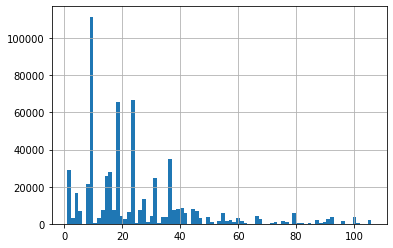

In [19]:
data_train.Page_category.hist(bins=81)

In [20]:
data_train.Page_category.value_counts()

# si on se réfère à la documentation, on remarque que les pages de groupes de musique par exemple
# sont beaucoup plus nombreuses que celle d'informatique et donc ont le plus de posts

9     110313
24     66473
18     63314
36     35163
16     27805
       ...  
62       232
63        58
58        29
83        15
93        15
Name: Page_category, Length: 81, dtype: int64

### Repartition Target variable (Nbr de commentaires)

<AxesSubplot:>

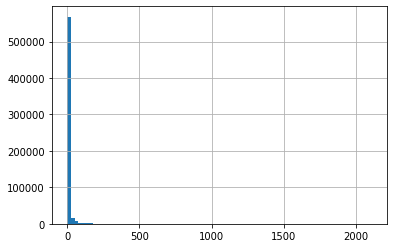

In [65]:
data_train.Target_variable.hist(bins=81)

In [66]:
data_train.Target_variable.describe()

count    602813.000000
mean          7.163027
std          34.462254
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max        2106.000000
Name: Target_variable, dtype: float64

Cela nous permet de voir un "default" du dataset qui va nous embeter dans toute la suite du projet : des valeurs gigantesques comparées à presque 99% des autres valeurs. 

## Nettoyage du dataset

In [21]:
# drop duplicates
clean_train = data_train.drop_duplicates()

In [22]:
# ignore constant column
clean_train = clean_train.loc[:, clean_train.columns != 'Post_promotion_status']

## Matrices de corrélation

### Sur toutes les colonnes

In [23]:
correlation_all = clean_train.corr()
correlation_all['Target_variable'].sort_values(ascending=False)

Target_variable             1.000000
CC2                         0.537412
CC5                         0.372872
CC2_avg                     0.366998
CC1_avg                     0.357139
CC4_avg                     0.354599
CC1_median                  0.350421
CC4_median                  0.349301
CC3_avg                     0.346667
CC2_median                  0.343330
CC4                         0.339764
CC5_std                     0.333118
CC1                         0.324232
CC3_std                     0.322893
CC2_std                     0.322678
CC1_std                     0.313069
CC4_std                     0.306868
CC3_median                  0.285782
CC1_max                     0.237337
CC4_max                     0.231559
CC2_max                     0.224822
CC5_max                     0.224355
CC3_max                     0.224143
CC5_avg                     0.193347
Page_talking_about          0.193326
CC4_min                     0.142395
CC1_min                     0.140622
P

### Sur une selection de colonnes

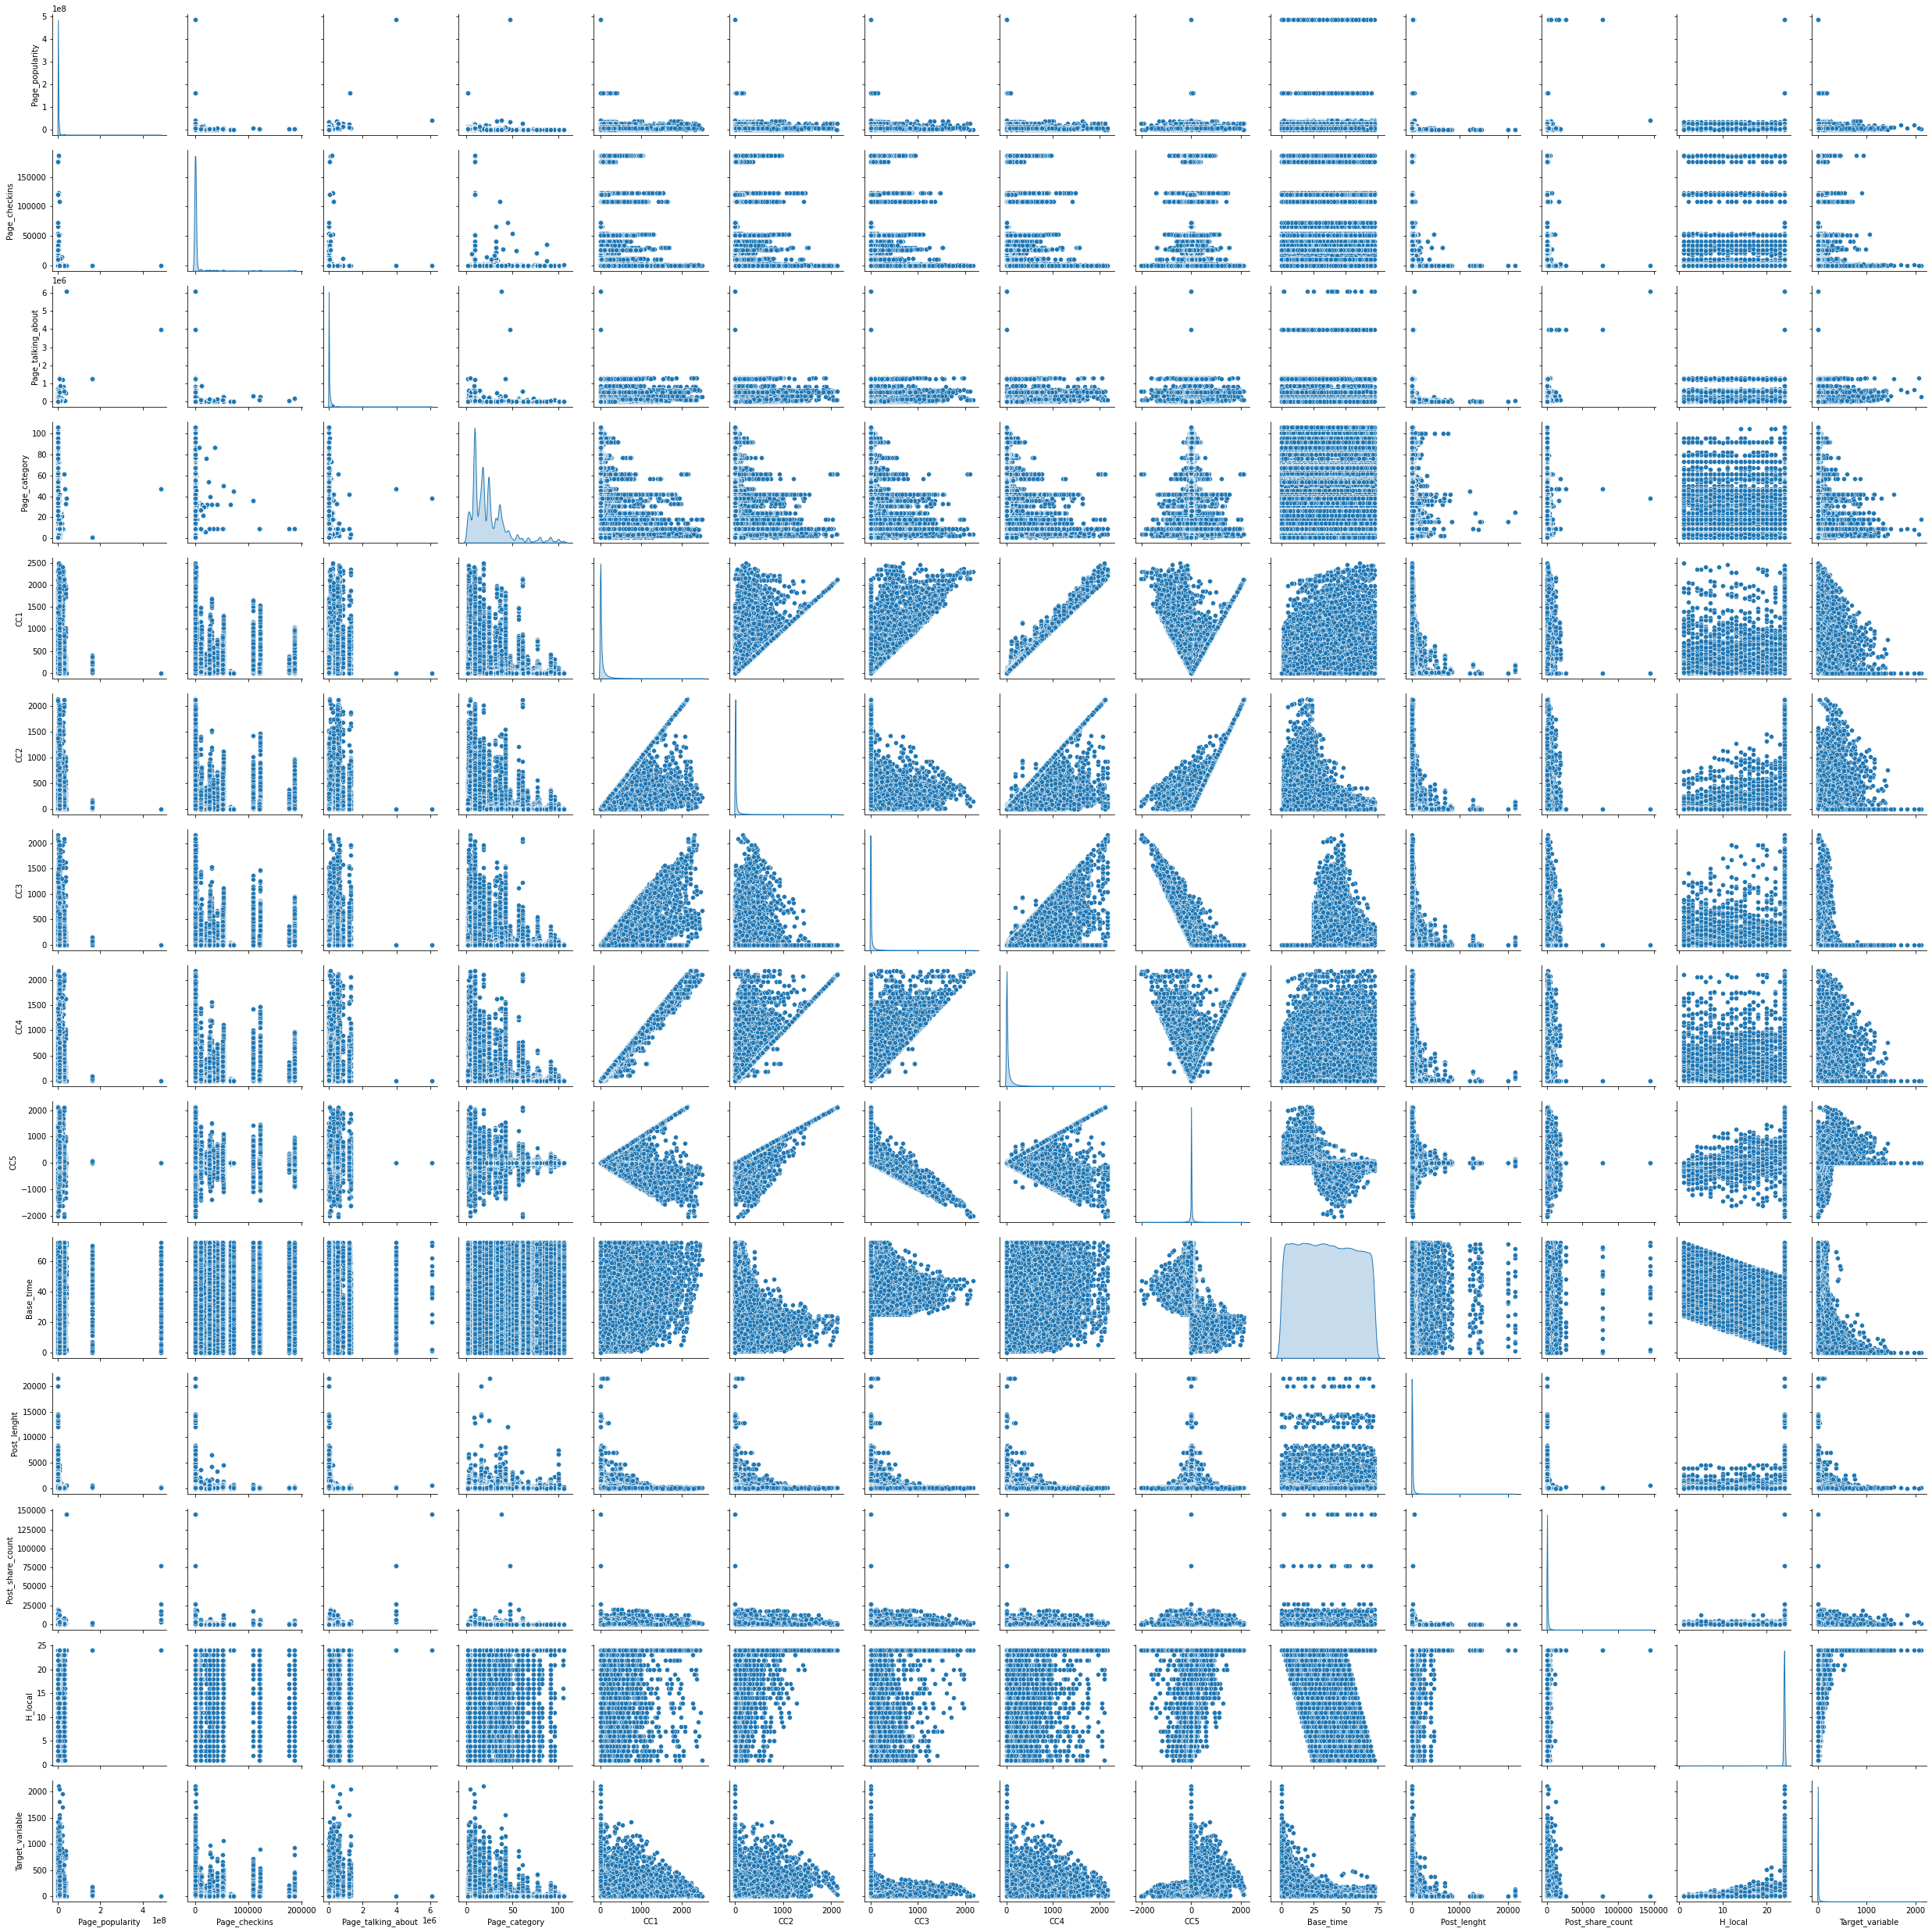

In [64]:
sn.pairplot(clean_train[selected_columns], diag_kind='kde')

On ignore les colonnes dérivées et celles sur le jour de la semaine

In [26]:
selected_columns = ['Page_popularity', 'Page_checkins', 'Page_talking_about',
       'Page_category', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base_time', 
       'Post_lenght', 'Post_share_count', 'H_local', 'Target_variable']

In [27]:
correlation = clean_train[selected_columns].corr()
correlation['Target_variable'].sort_values(ascending=False)

Target_variable       1.000000
CC2                   0.537412
CC5                   0.372872
CC4                   0.339764
CC1                   0.324232
Page_talking_about    0.193326
Post_share_count      0.130621
CC3                   0.072194
Page_popularity       0.065862
Page_checkins         0.033112
H_local               0.012202
Post_lenght          -0.001097
Page_category        -0.069680
Base_time            -0.223673
Name: Target_variable, dtype: float64

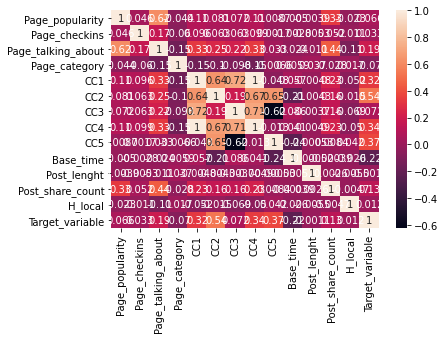

In [32]:
sn.heatmap(correlation, annot=True)
plt.show()

### Que sur les colonnes liées au jours de la semaine

In [33]:
week_days = ['Post_published_sunday',
       'Post_published_monday', 'Post_published_tuesday',
       'Post_published_wednesday', 'Post_published_thursday',
       'Post_published_friday', 'Post_published_saturday', 'Target_variable']

In [34]:
correlation_days = clean_train[week_days].corr()
correlation_days['Target_variable'].sort_values(ascending=False)

Target_variable             1.000000
Post_published_wednesday    0.018604
Post_published_tuesday      0.006499
Post_published_sunday       0.001416
Post_published_monday      -0.002367
Post_published_thursday    -0.007064
Post_published_saturday    -0.008274
Post_published_friday      -0.009621
Name: Target_variable, dtype: float64

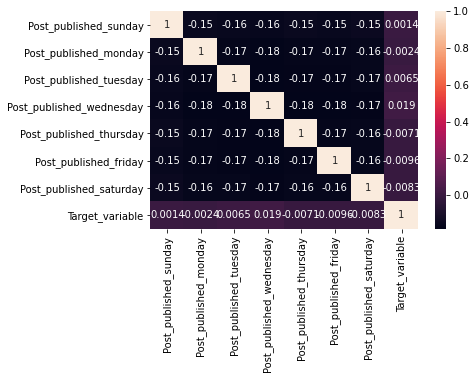

In [35]:
sn.heatmap(correlation_days, annot=True)
plt.show()

On peut voir que ces colonnes n'ont pas l'air d'avoir à premier abord une grande influence sur la Target Variable (le nombre de commentaires)

### Les colonnes DateTime

In [36]:
datetime = ['Base_DateTime_sunday', 'Base_DateTime_monday', 'Base_DateTime_tuesday',
       'Base_DateTime_wednesday', 'Base_DateTime_thursday',
       'Base_DateTime_friday', 'Base_DateTime_saturday', 'Target_variable']

In [37]:
correlation_datetime = clean_train[datetime].corr()
correlation_datetime['Target_variable'].sort_values(ascending=False)

Target_variable            1.000000
Base_DateTime_wednesday    0.018891
Base_DateTime_tuesday      0.005836
Base_DateTime_thursday     0.001850
Base_DateTime_monday      -0.003742
Base_DateTime_friday      -0.006630
Base_DateTime_sunday      -0.007982
Base_DateTime_saturday    -0.008553
Name: Target_variable, dtype: float64

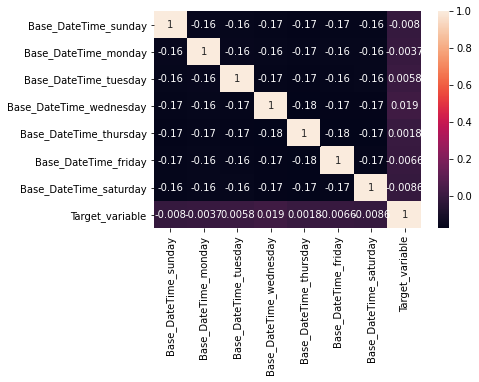

In [38]:
sn.heatmap(correlation_datetime, annot=True)
plt.show()

Même observation que pour les jours de la semaine

# Feature engineering

Nous avons donc décidés de réunir les informations contenues dans les colonnes des jours de la semaine et DateTime dans une colonne chacune

### 7 week_days in 1 column

In [40]:
len(clean_train)

602405

In [41]:
week_day_num = []

for index, row in clean_train.iterrows():
  done = False
  while done is False:

    if row["Post_published_monday"] == 1:
      week_day_num.append(1)
      done = True

    if row["Post_published_tuesday"] == 1:
      week_day_num.append(2)
      done = True 

    if row["Post_published_wednesday"] == 1:
      week_day_num.append(3)
      done = True 

    if row["Post_published_thursday"] == 1:
      week_day_num.append(4)
      done = True

    if row["Post_published_friday"] == 1:
      week_day_num.append(5)
      done = True

    if row["Post_published_saturday"] == 1:
      week_day_num.append(6)
      done = True

    if row["Post_published_sunday"] == 1:
      week_day_num.append(7)
      done = True
    
    done = True

print(len(week_day_num))

602405


In [42]:
week_day_num[1:6]

[4, 5, 5, 1, 2]

In [43]:
clean_train["Post_published_day_num"] = week_day_num
clean_train.head(3)

,Page_popularity,Page_checkins,Page_talking_about,Page_category,CC1_min,CC1_max,CC1_avg,CC1_median,CC1_std,CC2_min,...,Post_published_saturday,Base_DateTime_sunday,Base_DateTime_monday,Base_DateTime_tuesday,Base_DateTime_wednesday,Base_DateTime_thursday,Base_DateTime_friday,Base_DateTime_saturday,Target_variable,Post_published_day_num
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,3
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,1,0,0,4
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,5


In [45]:
clean_train.to_csv(f"{path_train}Clean_Train_Full.csv", sep=',', index=False)

## Datetime_day in 1 column

In [47]:
clean_train = pd.read_csv(f"{path_train}Clean_Train_Full.csv")
clean_train.info

<bound method DataFrame.info of         Page_popularity  Page_checkins  Page_talking_about  Page_category  \
0                634995              0                 463              1   
1                634995              0                 463              1   
2                634995              0                 463              1   
3                634995              0                 463              1   
4                634995              0                 463              1   
...                 ...            ...                 ...            ...   
602400          7170111             70              497000              9   
602401          7170111             70              497000              9   
602402          7170111             70              497000              9   
602403          7170111             70              497000              9   
602404          7170111             70              497000              9   

        CC1_min  CC1_max     CC1_avg  CC1_m

In [48]:
clean_train.columns

Index(['Page_popularity', 'Page_checkins', 'Page_talking_about',
       'Page_category', 'CC1_min', 'CC1_max', 'CC1_avg', 'CC1_median',
       'CC1_std', 'CC2_min', 'CC2_max', 'CC2_avg', 'CC2_median', 'CC2_std',
       'CC3_min', 'CC3_max', 'CC3_avg', 'CC3_median', 'CC3_std', 'CC4_min',
       'CC4_max', 'CC4_avg', 'CC4_median', 'CC4_std', 'CC5_min', 'CC5_max',
       'CC5_avg', 'CC5_median', 'CC5_std', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5',
       'Base_time', 'Post_lenght', 'Post_share_count', 'H_local',
       'Post_published_sunday', 'Post_published_monday',
       'Post_published_tuesday', 'Post_published_wednesday',
       'Post_published_thursday', 'Post_published_friday',
       'Post_published_saturday', 'Base_DateTime_sunday',
       'Base_DateTime_monday', 'Base_DateTime_tuesday',
       'Base_DateTime_wednesday', 'Base_DateTime_thursday',
       'Base_DateTime_friday', 'Base_DateTime_saturday', 'Target_variable',
       'Post_published_day_num'],
      dtype='object')

In [49]:
datetime_day_num = []

for index, row in clean_train.iterrows():
  done = False
  while done is False:

    if row["Base_DateTime_monday"] == 1:
      datetime_day_num.append(1)
      done = True

    if row["Base_DateTime_tuesday"] == 1:
      datetime_day_num.append(2)
      done = True 

    if row["Base_DateTime_wednesday"] == 1:
      datetime_day_num.append(3)
      done = True 

    if row["Base_DateTime_thursday"] == 1:
      datetime_day_num.append(4)
      done = True

    if row["Base_DateTime_friday"] == 1:
      datetime_day_num.append(5)
      done = True

    if row["Base_DateTime_saturday"] == 1:
      datetime_day_num.append(6)
      done = True

    if row["Base_DateTime_sunday"] == 1:
      datetime_day_num.append(7)
      done = True
    
    done = True

print(len(datetime_day_num))

602405


In [50]:
datetime_day_num[1:6]

[5, 6, 1, 3, 5]

In [51]:
clean_train["Base_DateTime_day_num"] = datetime_day_num
clean_train.head(3)

,Page_popularity,Page_checkins,Page_talking_about,Page_category,CC1_min,CC1_max,CC1_avg,CC1_median,CC1_std,CC2_min,...,Base_DateTime_sunday,Base_DateTime_monday,Base_DateTime_tuesday,Base_DateTime_wednesday,Base_DateTime_thursday,Base_DateTime_friday,Base_DateTime_saturday,Target_variable,Post_published_day_num,Base_DateTime_day_num
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,1,0,3,6
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,4,5
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,1,0,5,6


In [52]:
selected_columns_datetime = ['Page_popularity', 'Page_checkins', 'Page_talking_about',
       'Page_category', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Base_time', 
       'Post_lenght', 'Post_share_count', 'H_local', 'Base_DateTime_day_num', 'Target_variable']

In [53]:
correlation_datetime = clean_train[selected_columns_datetime].corr()
correlation_datetime['Target_variable'].sort_values(ascending=False)

Target_variable          1.000000
CC2                      0.537412
CC5                      0.372872
CC4                      0.339764
CC1                      0.324232
Page_talking_about       0.193326
Post_share_count         0.130621
CC3                      0.072194
Page_popularity          0.065862
Page_checkins            0.033112
H_local                  0.012202
Post_lenght             -0.001097
Base_DateTime_day_num   -0.011937
Page_category           -0.069680
Base_time               -0.223673
Name: Target_variable, dtype: float64

In [55]:
clean_train.to_csv(f"{path_train}Clean_Train_Full.csv", sep=',', index=False)

## MAJ des fichiers test

In [56]:
import pandas as pd 

data_test = pd.read_csv(f"{path_test}All_Testing.csv")
data_test.info

<bound method DataFrame.info of      Page_popularity  Page_checkins  Page_talking_about  Page_category  \
0            1340759          33935               49392              9   
1             161455              0                5978              4   
2              92385             88               34785             70   
3             395272              0                3406             17   
4            4349418              0              614043              9   
..               ...            ...                 ...            ...   
995           220578              0               26719             92   
996           160261              0                4347             28   
997          4253181             40              472926              9   
998           952756              8              443107              9   
999          4716837              0              490422              5   

     CC1_min  CC1_max     CC1_avg  CC1_median     CC1_std  CC2_min  ...  \
0   

In [57]:
# drop duplicates
clean_test = data_test.drop_duplicates()

In [58]:
# ignore constant column
clean_test = clean_test.loc[:, clean_test.columns != 'Post_promotion_status']

In [59]:
clean_test.info

<bound method DataFrame.info of      Page_popularity  Page_checkins  Page_talking_about  Page_category  \
0            1340759          33935               49392              9   
1             161455              0                5978              4   
2              92385             88               34785             70   
3             395272              0                3406             17   
4            4349418              0              614043              9   
..               ...            ...                 ...            ...   
995           220578              0               26719             92   
996           160261              0                4347             28   
997          4253181             40              472926              9   
998           952756              8              443107              9   
999          4716837              0              490422              5   

     CC1_min  CC1_max     CC1_avg  CC1_median     CC1_std  CC2_min  ...  \
0   

In [60]:
week_day_num = []

for index, row in clean_test.iterrows():
  done = False
  while done is False:
    if row["Post_published_monday"] == 1:
      week_day_num.append(1)
      done = True

    if row["Post_published_tuesday"] == 1:
      week_day_num.append(2)
      done = True 

    if row["Post_published_wednesday"] == 1:
      week_day_num.append(3)
      done = True 

    if row["Post_published_thursday"] == 1:
      week_day_num.append(4)
      done = True

    if row["Post_published_friday"] == 1:
      week_day_num.append(5)
      done = True

    if row["Post_published_saturday"] == 1:
      week_day_num.append(6)
      done = True

    if row["Post_published_sunday"] == 1:
      week_day_num.append(7)
      done = True
    
    done = True

print(len(week_day_num))

1000


In [61]:
datetime_day_num = []

for index, row in clean_test.iterrows():
  done = False
  while done is False:

    if row["Base_DateTime_monday"] == 1:
      datetime_day_num.append(1)
      done = True

    if row["Base_DateTime_tuesday"] == 1:
      datetime_day_num.append(2)
      done = True 

    if row["Base_DateTime_wednesday"] == 1:
      datetime_day_num.append(3)
      done = True 

    if row["Base_DateTime_thursday"] == 1:
      datetime_day_num.append(4)
      done = True

    if row["Base_DateTime_friday"] == 1:
      datetime_day_num.append(5)
      done = True

    if row["Base_DateTime_saturday"] == 1:
      datetime_day_num.append(6)
      done = True

    if row["Base_DateTime_sunday"] == 1:
      datetime_day_num.append(7)
      done = True
    
    done = True

print(len(datetime_day_num))

1000


In [62]:
clean_test["Post_published_day_num"] = week_day_num
clean_test["Base_DateTime_day_num"] = datetime_day_num

In [63]:
clean_test.to_csv(f"{path_test}Clean_Test_Full.csv", sep=',', index=False)

# Creation dataset avec selection de colonnes

En nous basant sur l'exploration des données faite en amont nous avons décidés de faire deux datasets pour entrainer nos modèles et comparer les résultats.

Dans les deux cas, nous avons décidé d'ignorer les colonnes dérivées, et de nous concentrer sur les autres colonnes ainsi que les deux que nous avons créé. Nous aurons donc un total de 12 variables dans nos données d'entrainement.

In [45]:
clean_train = pd.read_csv(f"{path_train}Clean_Train_Full.csv")
clean_test = pd.read_csv(f"{path_test}Clean_Test_Full.csv")

DISCLAIMER : nous avons aussi fait des tests avec les 54 variables du dataset, mais les résulats étaient soit moins bons, soit similaires. Nous ne les avon spas inclus dans le notebook pour éviter le surplus d'information sans grand intérêt.

### Première selection (12 variables, totalité des lignes)

In [67]:
selected_columns_1 = ['CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Page_talking_about', 'Post_share_count', 
                    'Page_category', 'Base_time', 'Post_published_day_num', 'Base_DateTime_day_num', 
                    'Target_variable']

In [68]:
clean_train[selected_columns_1].to_csv(f"{path_train}Clean_Train_1.csv", sep=',', index=False)

In [69]:
clean_test[selected_columns_1].to_csv(f"{path_test}Clean_Test_1.csv", sep=',', index=False)

### Deuxième selection (12 variables, uniquement les nombre de commentaires < 100, perte de 1.7% des données)

In [70]:
selected_columns_2 = ['CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Page_talking_about', 'Post_share_count', 
                    'Page_category', 'Base_time', 'Post_published_day_num', 'Base_DateTime_day_num', 
                    'Target_variable']

In [71]:
clean_train_2 = clean_train[selected_columns_2]
clean_test_2 = clean_test[selected_columns_2]

In [72]:
print(len(clean_train_2.index), len(clean_test_2.index))

602405 1000


In [73]:
clean_train_2 = clean_train_2.loc[clean_train_2['Target_variable'] < 100]
clean_train_2['Target_variable'].describe()

count    593940.000000
mean          4.104388
std          11.253091
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          99.000000
Name: Target_variable, dtype: float64

In [74]:
clean_test_2 = clean_test_2.loc[clean_test_2['Target_variable'] < 100]
clean_test_2['Target_variable'].describe()

count    941.000000
mean       9.193411
std       17.852671
min        0.000000
25%        0.000000
50%        2.000000
75%        8.000000
max       99.000000
Name: Target_variable, dtype: float64

In [75]:
clean_train_2.to_csv(f"{path_train}Clean_Train_2.csv", sep=',', index=False)
clean_test_2.to_csv(f"{path_test}Clean_Test_2.csv", sep=',', index=False)

# Machine Learning

In [76]:
path_train = "/content/drive/MyDrive/Python_For_Data_Analysis/Dataset/Dataset/Training/"

path_test = "/content/drive/MyDrive/Python_For_Data_Analysis/Dataset/Dataset/Testing/TestSet/"

train_files = ['Features_Variant_1.csv', 'Features_Variant_2.csv', 'Features_Variant_3.csv', 
              'Features_Variant_4.csv', 'Features_Variant_5.csv']

test_files = ['Test_Case_1.csv', 'Test_Case_2.csv', 'Test_Case_3.csv',
              'Test_Case_4.csv', 'Test_Case_5.csv', 'Test_Case_6.csv', 
              'Test_Case_7.csv', 'Test_Case_8.csv', 'Test_Case_9.csv', 
              'Test_Case_10.csv']

### Metrics / Evaluation

Nous utilisons trois marqueurs pour évaluer nos modèles : l'erreur absolue moyenne, ainsi que la rmse, et le R2 Score pour repérer l'overfit.

In [77]:
def get_metrics(y_test, y_predicted):

  mae = metrics.mean_absolute_error(y_test, y_predicted)
  rmse = sqrt(metrics.mean_squared_error(y_test, y_predicted))
  r_2 = metrics.r2_score(y_test, y_predicted)

  print(f"Mean absolute error : {mae} \nRoot mean square error : {rmse} \nR_2 score : {r_2}")

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

  ax1.scatter(y_test, y_predicted)
  ax1.plot([0, max(y_test['Target_variable'])], [0, y_predicted.max()], '--k')

  ax1.axis('tight')
  ax1.set_xlabel('True nbr comments')
  ax1.set_ylabel('Predicted nbr comments')
  plt.tight_layout()

  error = y_predicted - y_test
  ax2.hist(error, bins=25)
  ax2.set_xlabel('Prediction Error [MPG]')
  _ = ax2.set_ylabel('Count')

  return {'Mean_absolute_error' : mae, 'Root_mean_square_error' : rmse, 'R_2_score' : r_2}

### Linear regression

In [112]:
from sklearn.linear_model import LinearRegression

def do_linear_regression(x_train, y_train, x_test, y_test):

  lr = LinearRegression()
  lr.fit(x_train, y_train)

  y_predicted_lin = lr.predict(x_test)

  return get_metrics(y_test, y_predicted_lin)

### Gradient boosting

In [113]:
from sklearn.ensemble import GradientBoostingRegressor

def do_gradient_boosting(x_train, y_train, x_test, y_test):

  gb = GradientBoostingRegressor()
  gb.fit(x_train, y_train)

  y_predicted_gb = gb.predict(x_test)

  y_predicted_gb = np.exp(y_predicted_gb) - 1
  y_predicted_gb = y_predicted_gb.reshape(len(y_predicted_gb),1)

  return get_metrics(y_test, y_predicted_gb)

### Polynomial regression

In [114]:
from sklearn.preprocessing import PolynomialFeatures

def do_poly_regression(x_train, y_train, x_test, y_test):

  poly = PolynomialFeatures(degree=2, include_bias=True)

  x_train_poly = poly.fit_transform(x_train)
  x_test_poly = poly.fit_transform(x_test)

  return do_linear_regression(x_train_poly, y_train, x_test_poly, y_test)

### Random forest

In [143]:
from sklearn.ensemble import RandomForestRegressor

def do_random_forest(x_train, y_train, x_test, y_test):

  rf = RandomForestRegressor(max_depth=8, random_state=0, n_estimators=100)

  rf.fit(x_train, y_train)

  y_predicted_rf = rf.predict(x_test)

  y_predicted_rf = np.exp(y_predicted_rf) - 1
  y_predicted_rf = y_predicted_rf.reshape(len(y_predicted_rf),1)

  eval = get_metrics(y_test, y_predicted_rf)

  return rf, eval

### Neural network (MLP)

In [144]:
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

def do_multi_layer_perception(x_train, y_train, x_test, y_test, layer_sizes):

  scaler = StandardScaler()
  scaler.fit(x_train)

  MLPReg = MLPRegressor(alpha = 1e-4, hidden_layer_sizes = layer_sizes, random_state = 12, max_iter = 500, 
                        activation = 'relu',verbose = True, early_stopping = True, learning_rate_init = 0.001)
  mlp = MLPReg.fit(scaler.transform(x_train), y_train)

  y_predicted_mlp = mlp.predict(scaler.transform(x_test))

  y_predicted_mlp = np.exp(y_predicted_mlp) - 1
  y_predicted_mlp = y_predicted_mlp.reshape(len(y_predicted_mlp),1)

  eval = get_metrics(y_test, y_predicted_mlp)

  return mlp, eval

### Keras regression neural network (DDN)

In [40]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [39]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [145]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.callbacks import EarlyStopping

def do_DDN_network(x_train, y_train, x_test, y_test, epochs):

  # normalization layer
  normalizer = preprocessing.Normalization()
  normalizer.adapt(np.array(x_train))

  # dnn model
  dnn_model = build_and_compile_model(normalizer)
  dnn_model.summary()

  # simple early stopping
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
  # fit model
  %%time
  history = dnn_model.fit(x_train, y_train, validation_split=0.2, verbose=True, epochs=epochs, callbacks=[es])

  plot_loss(history)

  y_predicted_dnn = dnn_model.predict(x_test)

  y_predicted_dnn = np.exp(y_predicted_dnn) - 1
  y_predicted_dnn = y_predicted_dnn.reshape(len(y_predicted_dnn),1)

  eval = get_metrics(y_test, y_predicted_dnn)

  return dnn_model, eval

### Selection 1

In [146]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [147]:
train_1 = pd.read_csv(f"{path_train}Clean_Train_1.csv")
train_1.columns

test_1 = pd.read_csv(f"{path_test}Clean_Test_1.csv")
test_1.columns

all_metrics_1 = []

On utilise une échantillon de 100 000 lignes

In [148]:
train_1 = train_1.sample(100000)

On applique la fonction log au nombre de commentaires pour atténuer la différence entre les grandes valeurs et le reste des données

In [149]:
train_1["log_Target_Variable"] = np.log(1 + train_1["Target_variable"])

In [150]:
x_train_1 = train_1.iloc[:,:11]
y_train_1 = train_1.iloc[:,-1:]

x_test_1 = test_1.iloc[:,:-1]
y_test_1 = test_1.iloc[:,-1:]

Regression lineaire

Mean absolute error : 25.608694985263284 
Root mean square error : 106.86441964748359 
R_2 score : -0.04161357929358123


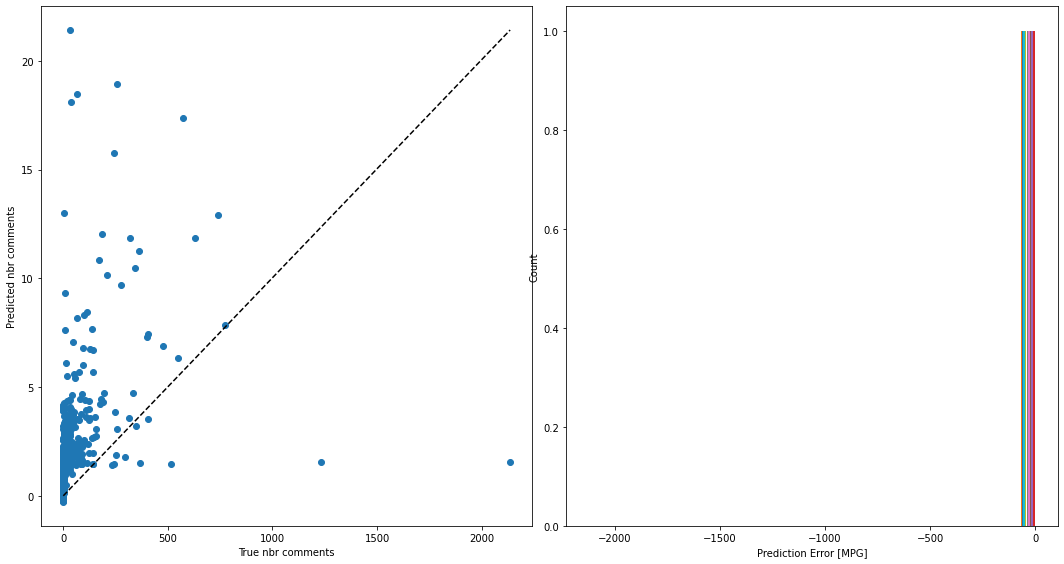

In [151]:
import numpy as np

metric = do_linear_regression(x_train_1, y_train_1, x_test_1, y_test_1)
all_metrics_1.append(metric)

Gradient boosting

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean absolute error : 19.045347336757693 
Root mean square error : 87.62734478889705 
R_2 score : 0.2996426763025941


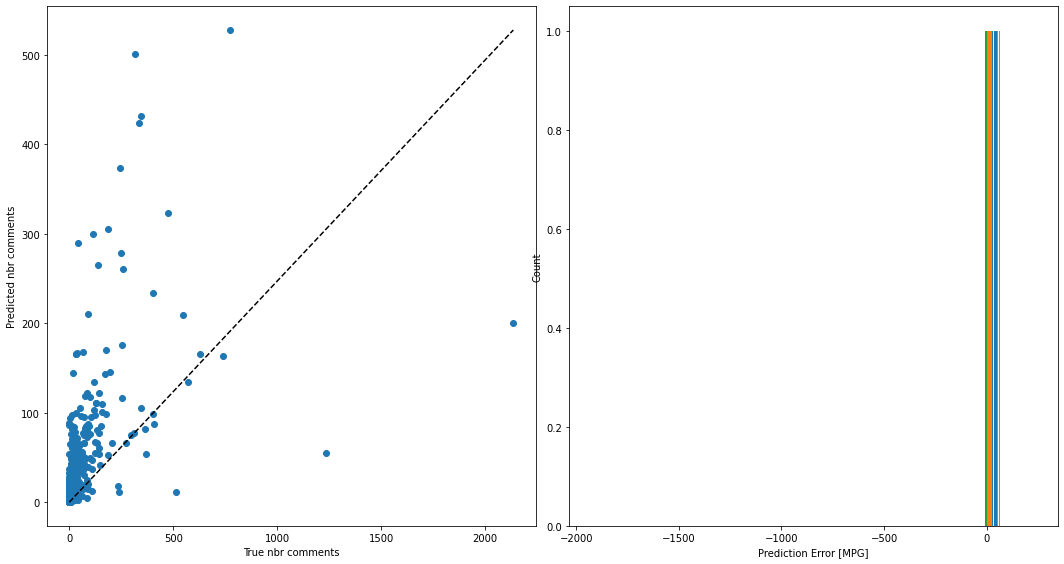

In [152]:
metric = do_gradient_boosting(x_train_1, y_train_1, x_test_1, y_test_1)
all_metrics_1.append(metric)

Poly regression

Mean absolute error : 25.659396234038894 
Root mean square error : 107.23925210078791 
R_2 score : -0.048933420682877315


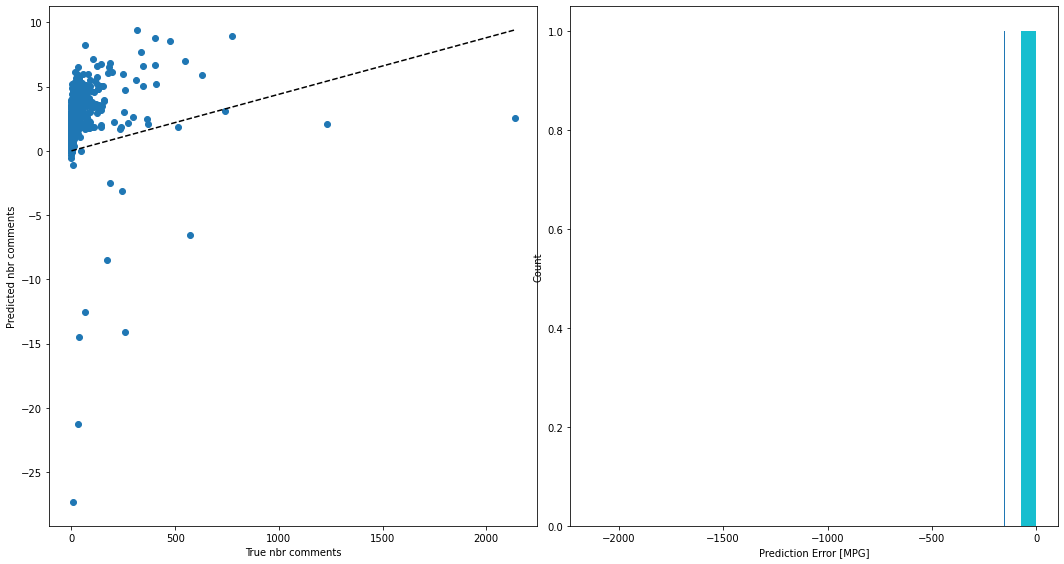

In [153]:
metric = do_poly_regression(x_train_1, y_train_1, x_test_1, y_test_1)
all_metrics_1.append(metric)

Random forest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Mean absolute error : 19.476137210491572 
Root mean square error : 85.58145134738157 
R_2 score : 0.3319643114291809


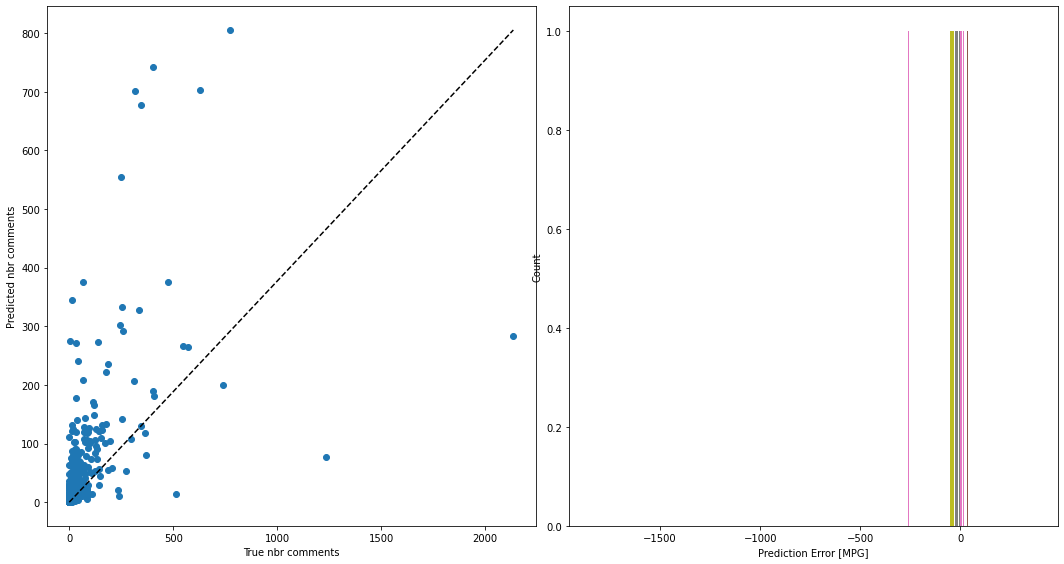

In [154]:
rf, metric = do_random_forest(x_train_1, y_train_1, x_test_1, y_test_1)
all_metrics_1.append(metric)

In [155]:
print(f"{np.argsort(rf.feature_importances_)[::-1]} \n{train_1.columns.to_list()}")

[ 1  8  6  5  0  3  4  7  2  9 10] 
['CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Page_talking_about', 'Post_share_count', 'Page_category', 'Base_time', 'Post_published_day_num', 'Base_DateTime_day_num', 'Target_variable', 'log_Target_Variable']


MLP

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.42687354
Validation score: 0.684443
Iteration 2, loss = 0.21509432
Validation score: 0.732812
Iteration 3, loss = 0.19222905
Validation score: 0.745573
Iteration 4, loss = 0.18251399
Validation score: 0.754139
Iteration 5, loss = 0.17570028
Validation score: 0.759602
Iteration 6, loss = 0.17118029
Validation score: 0.764505
Iteration 7, loss = 0.16734338
Validation score: 0.771542
Iteration 8, loss = 0.16431196
Validation score: 0.774781
Iteration 9, loss = 0.16236089
Validation score: 0.774951
Iteration 10, loss = 0.16091863
Validation score: 0.776990
Iteration 11, loss = 0.15904509
Validation score: 0.777687
Iteration 12, loss = 0.15750453
Validation score: 0.779319
Iteration 13, loss = 0.15593284
Validation score: 0.783672
Iteration 14, loss = 0.15474811
Validation score: 0.785589
Iteration 15, loss = 0.15400076
Validation score: 0.785361
Iteration 16, loss = 0.15288443
Validation score: 0.785470
Iteration 17, loss = 0.15273258
Validation score: 0.785089
Iterat

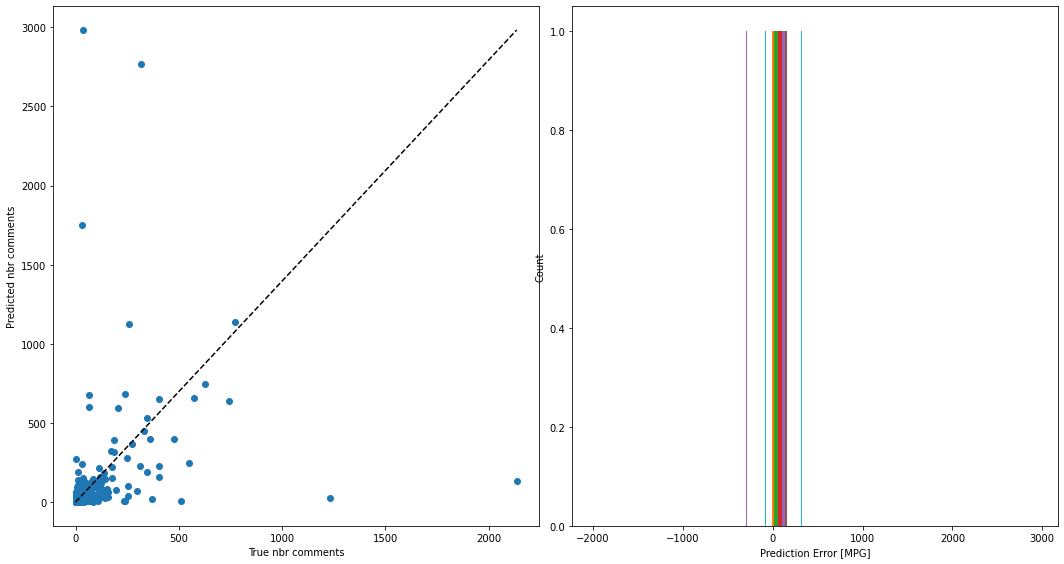

In [156]:
model, metric = do_multi_layer_perception(x_train_1, y_train_1, x_test_1, y_test_1, (20,4,))
all_metrics_1.append(metric)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_3 (Normalizati (None, 11)                23        
_________________________________________________________________
dense_6 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 5,016
Trainable params: 4,993
Non-trainable params: 23
_________________________________________________________________
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Epoch 1/20
2500/2500 [==============================] - 7s 3ms/step - loss: 0.4429 - val_loss: 0.3565
Epoch 2/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.3570 

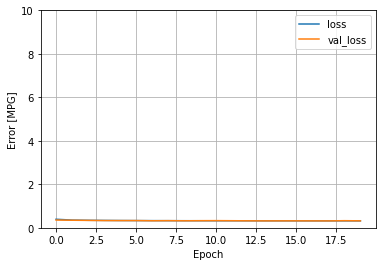

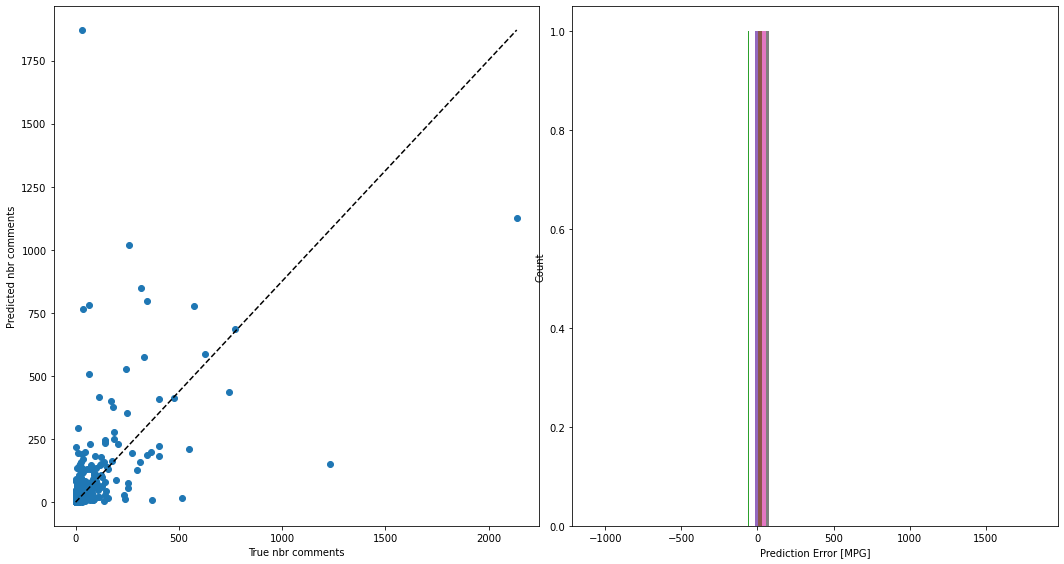

In [157]:
model_dnn, metric = do_DDN_network(x_train_1, y_train_1, x_test_1, y_test_1, 20)
all_metrics_1.append(metric)

In [175]:
results = pd.DataFrame(all_metrics_1)
results["Model"] = ["Linear regression", "Gradient Boosting", "Polynomial Regression", "Random Forest", "MLP", "DNN"]
results = results[["Model", "Mean_absolute_error", "Root_mean_square_error", "R_2_Score"]]
results

,Model,Mean_absolute_error,Root_mean_square_error,R_2_Score
0,Linear regression,25.608695,106.864420,-0.041614
1,Gradient Boosting,19.045347,87.627345,0.299643
2,Polynomial Regression,25.659396,107.239252,-0.048933
3,Random Forest,19.476137,85.581451,0.331964
4,MLP,28.022778,163.244909,-1.430635
5,DNN,24.661686,100.062625,0.086762


In [176]:
results.to_csv("Resultats_Selection1.csv", sep=',', index=False)

### Selection 2

In [95]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [177]:
train_2 = pd.read_csv(f"{path_train}Clean_Train_2.csv")
test_2 = pd.read_csv(f"{path_test}Clean_Test_2.csv")

all_metrics_2 = []

In [178]:
train_2 = train_2.sample(100000)

In [179]:
train_2["log_Target_Variable"] = np.log(1 + train_2["Target_variable"])

In [180]:
x_train_2 = train_2.iloc[:,:11]
y_train_2 = train_2.iloc[:,-1:]

x_test_2 = test_2.iloc[:,:-1]
y_test_2 = test_2.iloc[:,-1:]

Linear regression

Mean absolute error : 8.476263673506336 
Root mean square error : 18.844371228911864 
R_2 score : -0.11536922091943325


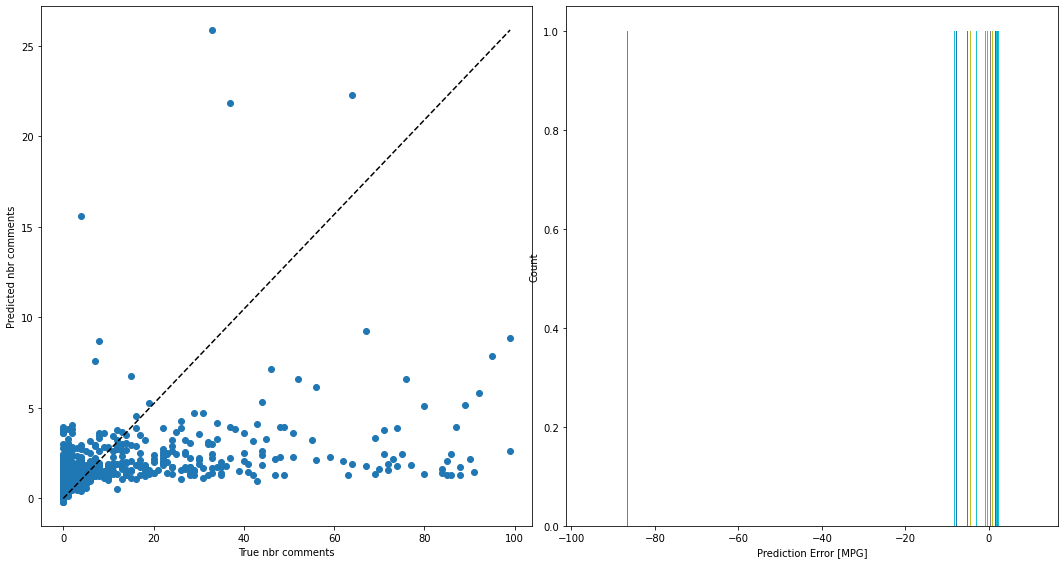

In [181]:
metric = do_linear_regression(x_train_2, y_train_2, x_test_2, y_test_2)
all_metrics_2.append(metric)

Gradient boosting

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean absolute error : 6.767321502063534 
Root mean square error : 13.668256063814681 
R_2 score : 0.4132115373192855


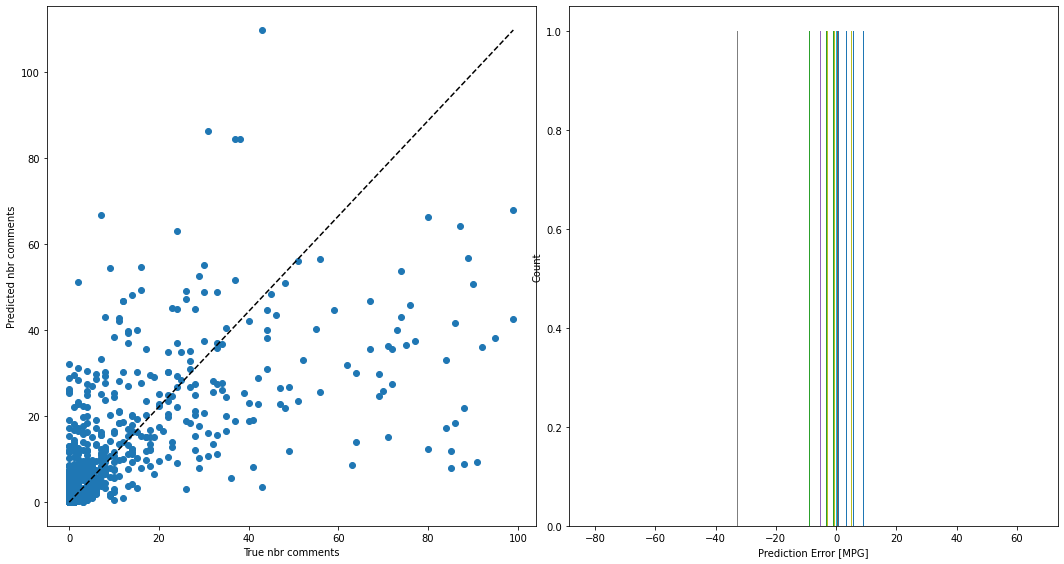

In [182]:
metric = do_gradient_boosting(x_train_2, y_train_2, x_test_2, y_test_2)
all_metrics_2.append(metric)

Poly regression

Mean absolute error : 8.522872469572423 
Root mean square error : 19.246599989211248 
R_2 score : -0.1634919800888479


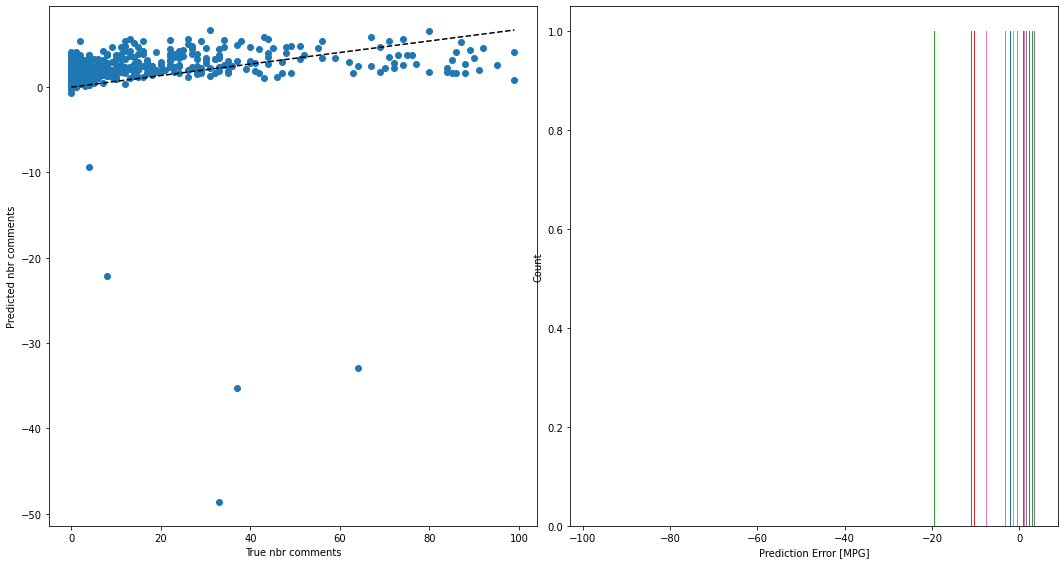

In [183]:
metric = do_poly_regression(x_train_2, y_train_2, x_test_2, y_test_2)
all_metrics_2.append(metric)

Random forest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Mean absolute error : 6.5542549582236 
Root mean square error : 13.140795808387779 
R_2 score : 0.4576262185302975


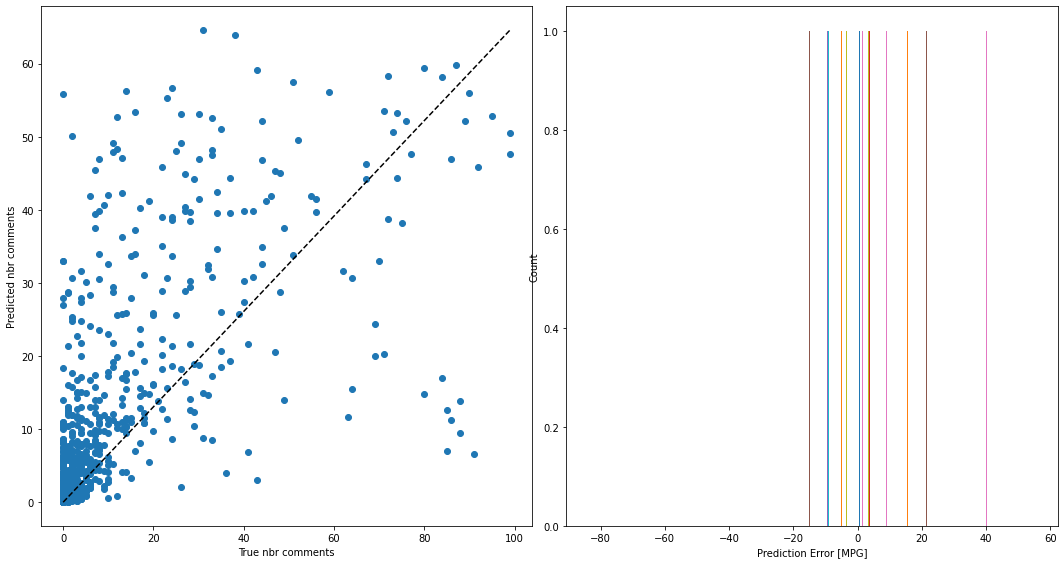

In [185]:
rf, metric = do_random_forest(x_train_2, y_train_2, x_test_2, y_test_2)
all_metrics_2.append(metric)

In [186]:
print(f"{np.argsort(rf.feature_importances_)[::-1]} \n{train_1.columns.to_list()}")

[ 1  8  6  5  7  0  3  4  2  9 10] 
['CC1', 'CC2', 'CC3', 'CC4', 'CC5', 'Page_talking_about', 'Post_share_count', 'Page_category', 'Base_time', 'Post_published_day_num', 'Base_DateTime_day_num', 'Target_variable', 'log_Target_Variable']


MLP

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.37504332
Validation score: 0.655939
Iteration 2, loss = 0.18884569
Validation score: 0.709041
Iteration 3, loss = 0.17146268
Validation score: 0.723369
Iteration 4, loss = 0.16505736
Validation score: 0.733629
Iteration 5, loss = 0.16035610
Validation score: 0.740381
Iteration 6, loss = 0.15708511
Validation score: 0.743305
Iteration 7, loss = 0.15427100
Validation score: 0.747274
Iteration 8, loss = 0.15196798
Validation score: 0.750057
Iteration 9, loss = 0.15020454
Validation score: 0.754038
Iteration 10, loss = 0.14897271
Validation score: 0.756144
Iteration 11, loss = 0.14793331
Validation score: 0.756316
Iteration 12, loss = 0.14690851
Validation score: 0.760776
Iteration 13, loss = 0.14617294
Validation score: 0.760333
Iteration 14, loss = 0.14564400
Validation score: 0.761856
Iteration 15, loss = 0.14476944
Validation score: 0.763586
Iteration 16, loss = 0.14406218
Validation score: 0.764179
Iteration 17, loss = 0.14339190
Validation score: 0.765327
Iterat

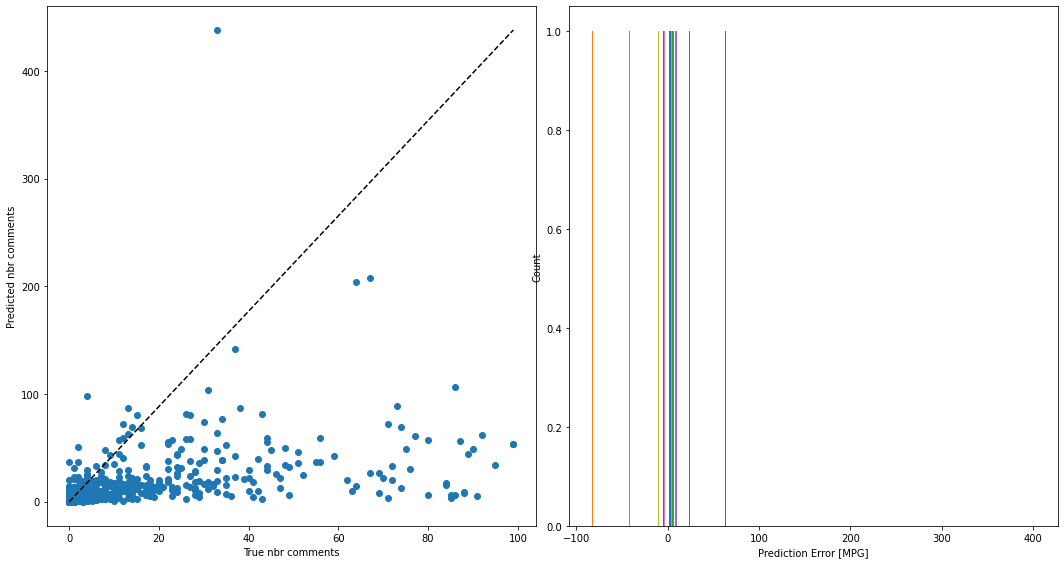

In [187]:
model, metric = do_multi_layer_perception(x_train_2, y_train_2, x_test_2, y_test_2, (20,4,))
all_metrics_2.append(metric)

Regression neural network

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_4 (Normalizati (None, 11)                23        
_________________________________________________________________
dense_9 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 5,016
Trainable params: 4,993
Non-trainable params: 23
_________________________________________________________________
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
Epoch 1/20
2500/2500 [==============================] - 7s 3ms/step - loss: 0.4529 - val_loss: 0.3594
Epoch 2/20
2500/2500 [==============================] - 4s 2ms/step - loss: 0.3559 

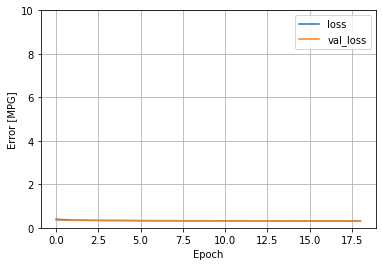

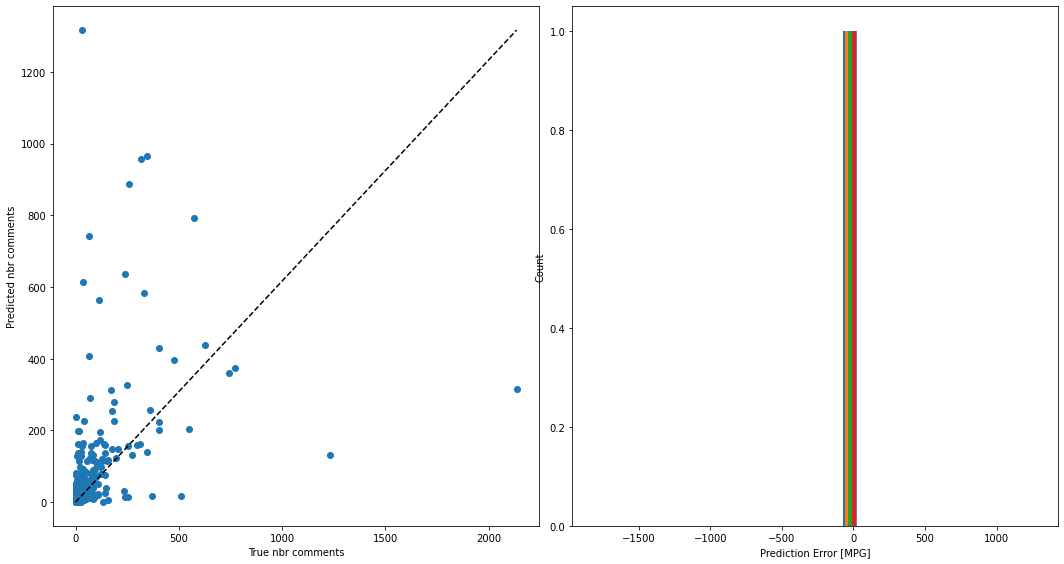

In [188]:
model_dnn, metric = do_DDN_network(x_train_1, y_train_1, x_test_1, y_test_1, 20)
all_metrics_2.append(metric)

In [191]:
results = pd.DataFrame(all_metrics_2)
results["Model"] = ["Linear regression", "Gradient Boosting", "Polynomial Regression", "Random Forest", "MLP", "DNN"]
results = results[["Model", "Mean_absolute_error", "Root_mean_square_error", "R_2_score"]]
results

,Model,Mean_absolute_error,Root_mean_square_error,R_2_score
0,Linear regression,8.476264,18.844371,-0.115369
1,Gradient Boosting,6.767322,13.668256,0.413212
2,Polynomial Regression,8.522872,19.246600,-0.163492
3,Random Forest,6.554255,13.140796,0.457626
4,MLP,7.963365,21.472808,-0.448215
5,DNN,24.458314,103.346191,0.025842


In [192]:
results.to_csv("Resultats_Selection2.csv", sep=',', index=False)